In [1]:
from qiskit.circuit.library import TwoLocal
from qiskit.primitives import Estimator
from qiskit_algorithms import VQE
from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms.optimizers import SPSA, ADAM
import numpy as np
import matplotlib.pyplot as plt

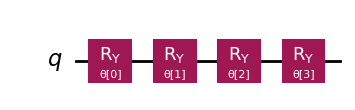

In [2]:
num_qubits = 1 
ansatz = TwoLocal(num_qubits, 'ry', 'cz')
optimizer = ADAM(maxiter=100)
ansatz.decompose().draw("mpl")

In [3]:
estimator = Estimator()
vqe = VQE(estimator, ansatz, optimizer)

/tmp/ipykernel_198489/2449948782.py:1: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


In [4]:
E1 = 0.0
E2 = 4.0

V11 = 3.0
V22 = -3.0
V12 = V21 = 0.2

'\nH0 = np.array([[E1, 0],\n               [0, E2]])\n\nHI = np.array([[V11, V12],\n              [V21, V22]])\n\nH2_op = H0 + lmbda * HI'

<>:27: SyntaxWarning: invalid escape sequence '\l'
<>:27: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_198489/3184014442.py:27: SyntaxWarning: invalid escape sequence '\l'
  plt.title("Eigenenergy vs. $\lambda$")


-3.9996869424117287
-3.9436136566410207
-3.8722579274712827
-3.828739922651016
-3.743656616304951
-3.7190979265736197
-3.632267550926007
-3.5676733541861054
-3.5305914510895593
-3.4587973204694893
-3.3771285566512987
-3.3630629230581084
-3.299155446777603
-3.2092697953436007
-3.1857324691640105
-3.09167055267437
-3.098905218215444
-2.915817171956013
-2.9572022881305857
-2.9289645921912117
-2.8312858454633445
-2.7897455374563394
-2.7504979841779438
-2.704846902313194
-2.618160253149851
-2.536172584965601
-2.525026212984878
-2.296814381819363
-2.43195488241103
-2.3721007486710355
-2.3197239369904494
-2.1035645673617553
-1.992501816083255
-2.1513085284046602
-1.8585341796469765
-1.7631294416858625
-1.9465356019181717
-1.8990576562888921
-1.5893069240634692
-1.7719675047467989
-1.7576725953610146
-1.4774777407221722
-1.6428622902049497
-1.5911992554994223
-1.2395478772496265
-1.2934861132961515
-1.4235983051124905
-1.3674750906923827
-1.2882719560737017
-0.9095491633263776
-0.8712742772598

/tmp/ipykernel_198489/3184014442.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


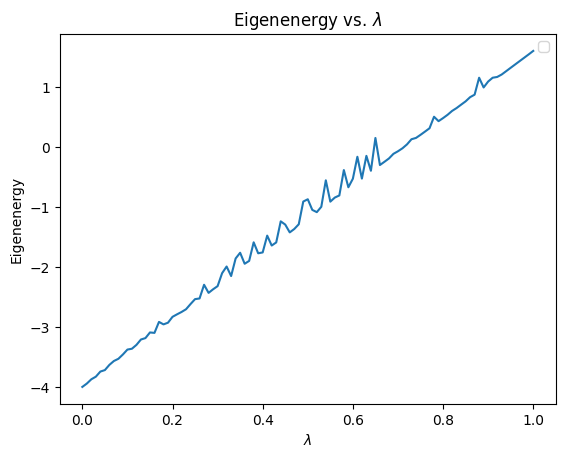

In [5]:
def problem_c() -> None:
    lambdas = np.linspace(0, 1, 101)

    lower_eig = []

    for lmbda in lambdas:


        #Defining the coefficients for the Pauli terms. Have to convert the Hamiltonian to a SparsePauliOp to use VQE.
        coefficients = [
            ("II", (lmbda*V11) + E1), 
            ("ZZ", (lmbda*V22) + E2),
            ("XX", lmbda*V12),
            ("YY", lmbda*V21),
        ]

        # Create the SparsePauliOp
        H2_op = SparsePauliOp.from_list(coefficients)

        minresult = vqe.compute_minimum_eigenvalue(H2_op)
        lower_eig.append(minresult.eigenvalue)
        print(minresult.eigenvalue)
     

    plt.plot(lambdas, lower_eig)
    plt.title("Eigenenergy vs. $\lambda$")
    plt.xlabel(r"$\lambda$")
    plt.ylabel("Eigenenergy")
    plt.legend()
    plt.savefig("images/problem_c.png")
    plt.show()

problem_c()